In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt

# dataset link
 https://www.kaggle.com/datasets/cerolacia/black-friday-sales-prediction

In [2]:
df=pd.read_csv(r"D:\Digital Sem 2\Capstone Project\BlackFriday.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

### From the analsysis we can find that there are more number of missing values in product category 2 and product category 3
### We will be removing product category 3 and then will replace all the missing values of product category 2 with the median value

In [7]:
x = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(x, inplace=True)

In [8]:
y=df['Product_Category_3'].median()
df['Product_Category_3'].fillna(y, inplace=True)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
### Dropping unwanted columns from the dataset (dropping columns like user_id and product_id )
df.drop(labels=['User_ID','Product_ID'],axis=1,inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      537577 non-null  object 
 1   Age                         537577 non-null  object 
 2   Occupation                  537577 non-null  int64  
 3   City_Category               537577 non-null  object 
 4   Stay_In_Current_City_Years  537577 non-null  object 
 5   Marital_Status              537577 non-null  int64  
 6   Product_Category_1          537577 non-null  int64  
 7   Product_Category_2          537577 non-null  float64
 8   Product_Category_3          537577 non-null  float64
 9   Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 41.0+ MB


C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


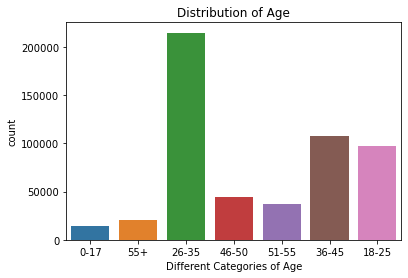

In [12]:
sn.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

## HEATMAP

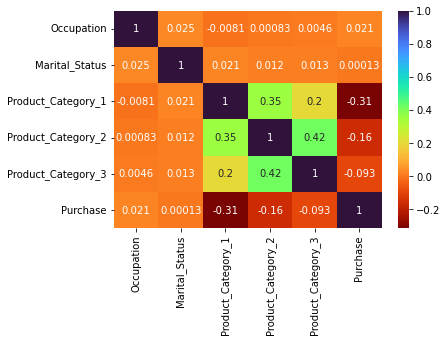

In [13]:
sn.heatmap(df.corr(),annot=True,cmap='turbo_r')
plt.show()

From the heatmap we can see that there is negavtive coorelation between purchase and product categories 1, 2 and 3

# Plotting the target variable 

C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


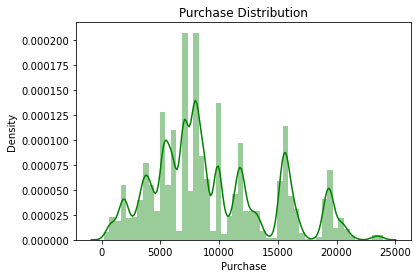

In [14]:
sn.distplot(df["Purchase"],color='g')
plt.title("Purchase Distribution")
plt.show()

C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


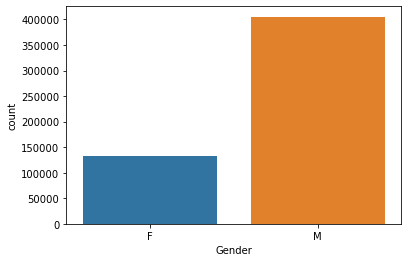

In [15]:
sn.countplot(df['Gender'])
plt.show()

In [16]:
df.groupby("Gender").mean()["Purchase"]


Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

From the groupby method we can see that the males spent more for the sales compared to the females 


C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


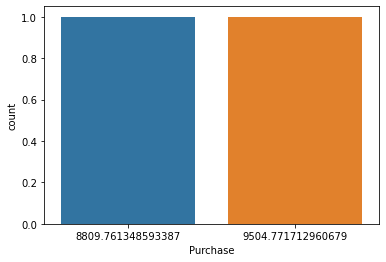

In [17]:
sn.countplot(df.groupby("Gender").mean()["Purchase"])
plt.show()

###### Plotting the martial status

C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


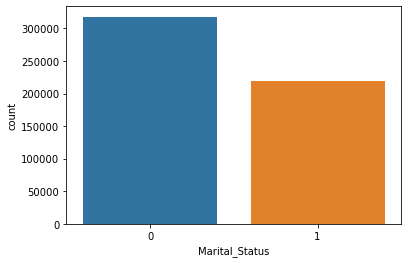

In [18]:
sn.countplot(df['Marital_Status'])
plt.show()

In [19]:
df.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9333.325467
1    9334.632681
Name: Purchase, dtype: float64

##### Plotting the occupation of the people 

C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


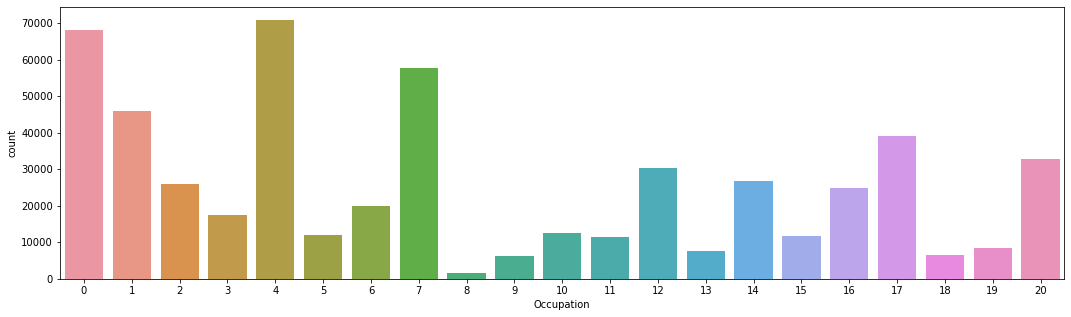

In [20]:
plt.figure(figsize=(18,5))
sn.countplot(df['Occupation'])
plt.show()

In [21]:
df.groupby("Occupation").mean()["Purchase"]

Occupation
0     9186.946726
1     9017.703095
2     9025.938982
3     9238.077277
4     9279.026742
5     9388.848978
6     9336.378620
7     9502.175276
8     9576.508530
9     8714.335934
10    9052.836410
11    9299.467190
12    9883.052460
13    9424.449391
14    9568.536426
15    9866.239925
16    9457.133118
17    9906.378997
18    9233.671418
19    8754.249162
20    8881.099514
Name: Purchase, dtype: float64

C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


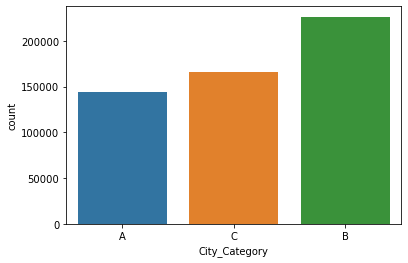

In [22]:
sn.countplot(df['City_Category'])
plt.show()

In [23]:
df.groupby("City_Category").mean()["Purchase"]

City_Category
A    8958.011014
B    9198.657848
C    9844.441855
Name: Purchase, dtype: float64

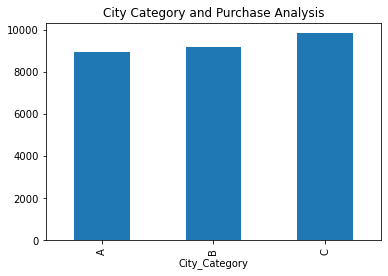

In [24]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

#### It is observed that city category B has made the most number of puchases.

# Data standardization 

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]=scaler.fit_transform(df[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']])

In [26]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,0.404136,0.408797,0.252679,0.473784,0.706234,0.384794
std,0.326206,0.491612,0.220629,0.265113,0.157389,0.209498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.000000,0.000000,0.375000,0.733333,0.238938
50%,0.350000,0.000000,0.235294,0.437500,0.733333,0.331300
75%,0.700000,1.000000,0.411765,0.750000,0.733333,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


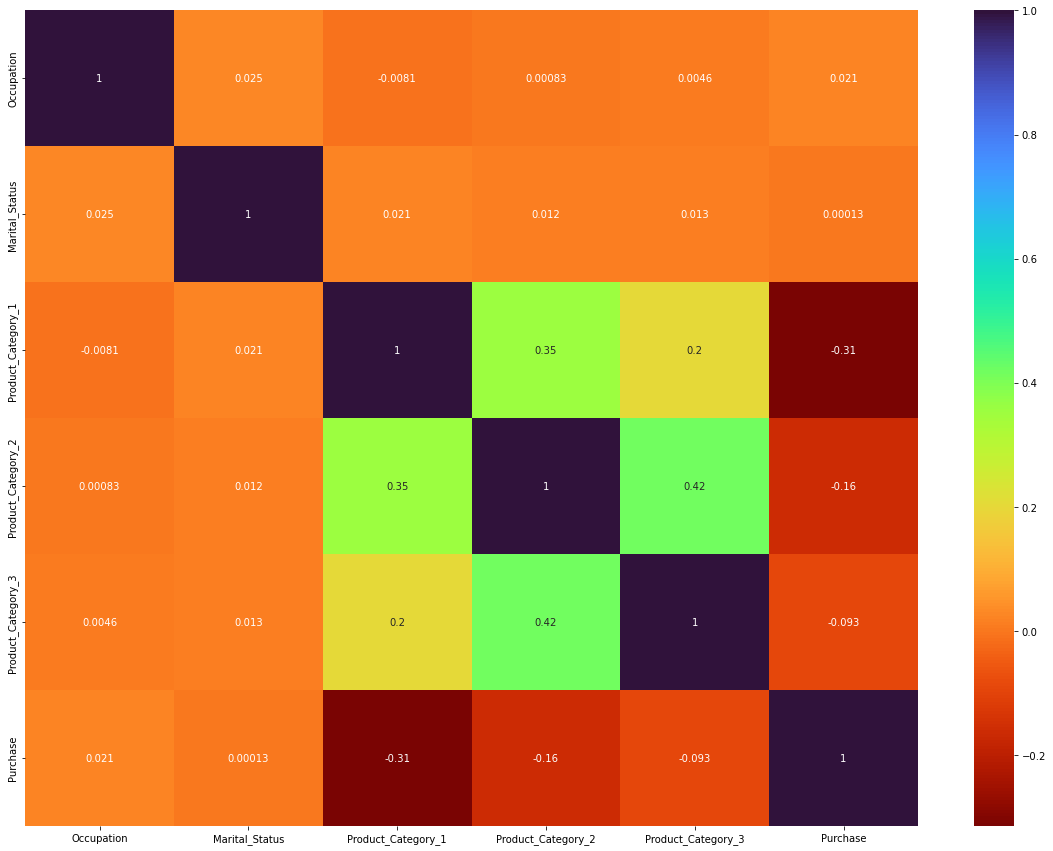

In [27]:
plt.figure(figsize=(20,15))
sn.heatmap(df.corr(),annot=True,cmap='turbo_r')
plt.show()

### Using the label encoder to code the categorigal details as numbers

In [28]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [29]:
# here we change the gender, age and city category into numbers using label encoder

df['Gender'] = lr.fit_transform(df['Gender'])
df['Age'] = lr.fit_transform(df['Age'])
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [30]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0.5,0,2,0,0.117647,0.4375,0.733333,0.344255
1,0,0,0.5,0,2,0,0.000000,0.2500,0.733333,0.631519
2,0,0,0.5,0,2,0,0.647059,0.4375,0.733333,0.052027
3,0,0,0.5,0,2,0,0.647059,0.7500,0.733333,0.036676
4,1,6,0.8,2,4+,0,0.411765,0.4375,0.733333,0.327389
...,...,...,...,...,...,...,...,...,...,...
537572,1,3,0.8,2,1,0,0.000000,0.0000,0.733333,0.482798
537573,1,3,0.8,2,1,0,0.000000,0.8125,0.866667,0.799588
537574,1,3,0.8,2,1,0,0.411765,0.8125,0.733333,0.330501
537575,1,3,0.8,2,1,0,0.235294,0.4375,0.733333,0.293868


In [31]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+',"") # changing the '+' sign 

C:\Users\RR_10\AppData\Local\Temp/ipykernel_21204/263220987.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+',"") # changing the '+' sign


In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [34]:
 ### df["Stay_In_Current_City_Years"] is in string/object form we need to change it integer form  
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

### Splitting the dataset into training and testing the data

In [35]:
x= df.drop("Purchase",axis=1)
y=df['Purchase']


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Linear Regression 

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [41]:
# MEAN ABSOLUTE ERROR 
mean_absolute_error(y_test, y_pred)

0.15166254590794764

In [42]:
# MEAN SQUARE ERROR
mse_lr=mean_squared_error(y_test, y_pred)
print(mse_lr)

0.03900083956439393


In [43]:
# R-SQUARED SCORE

r2_lr=r2_score(y_test, y_pred)
print(r2_lr)

0.10876756035072643


In [44]:
# ROOT-MEAN SQUARE ERROR 

from math import sqrt
rmse_lr=sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of Linear Regression Model is ",rmse_lr)

RMSE of Linear Regression Model is  0.19748630221965757


# Ridge Regression

In [45]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(x_train,y_train)

pred_r = rr.predict(x_test)
print(pred_r)

[0.28578105 0.35480564 0.36569482 ... 0.28591283 0.35983258 0.47122531]


In [46]:
#  R-SQUARED SCORE
r2_rr = r2_score(y_test,pred_r)
print(r2_rr)


0.10876749807248709


In [47]:
# MEAN SQUARE ERROR
mse_rr=mean_squared_error(y_test, pred_r)
print(mse_rr)

0.03900084228972519


In [48]:
# ROOT-MEAN SQUARE ERROR 
rmse_rr=np.sqrt(mean_squared_error(y_test, pred_r))
print("RMSE of Ridge Regression Model is ",rmse_rr)

RMSE of Ridge Regression Model is  0.19748630911970882


# KNN REGRESSOR

In [49]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
neigh_pred = neigh.predict(x_test)
print(neigh_pred)


[0.32494953 0.41197005 0.21746719 ... 0.18314687 0.16417816 0.73706679]


In [50]:
# MEAN SQUARE ERROR
mse_knn=mean_squared_error(y_test, neigh_pred)
print(mse_knn)

0.015580797555663188


In [51]:
# R-SQUARED SCORE

r2_knn=r2_score(y_test, neigh_pred)
print(r2_knn)

0.6439535053011383


In [52]:
# ROOT-MEAN SQUARE ERROR 

from math import sqrt
rmse_knn=sqrt(mean_squared_error(y_test, neigh_pred))
print("RMSE of KNN Regression Model is ",rmse_knn)

RMSE of KNN Regression Model is  0.12482306499867397


# DECISION TREE REGRESSOR

In [53]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)

In [54]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [55]:
dt_y_pred = regressor.predict(x_test)

In [56]:
# MEAN ABSOLUTE ERROR
mean_absolute_error(y_test, dt_y_pred)

0.10004771218337324

In [57]:
# MEAN SQUARED ERROR
mse_dt=mean_squared_error(y_test, dt_y_pred)
print(mse_dt)

0.019990372327231675


In [58]:
# R-SQUARE SCORE

r2_dt=r2_score(y_test, dt_y_pred)
print(r2_dt)

0.5431875698655138


In [59]:
# ROOT MEAN SQUARE ERROR
rmse_dt=sqrt(mean_squared_error(y_test, dt_y_pred))
print("RMSE of Decision tree regressor Model is ",rmse_dt)

RMSE of Decision tree regressor Model is  0.14138731317636558


# RANDOM FOREST REGRESSOR

In [60]:
from sklearn.ensemble import RandomForestRegressor


In [61]:
# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 101) 

In [62]:
RFregressor.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [63]:
rf_y_pred = RFregressor.predict(x_test)
mean_absolute_error(y_test, rf_y_pred)


0.09406078095593423

In [64]:
# MEAN SQUARE ERROR 
mse_rf=mean_squared_error(y_test, rf_y_pred)
print(mse_rf)

0.016611474815312693


In [65]:
r2_rf=r2_score(y_test, rf_y_pred)
print(r2_rf)

0.6204008582589686


In [66]:
# ROOT  MEAN SQUARE ERROR 
rmse_rf=sqrt(mean_squared_error(y_test, rf_y_pred))
print("RMSE of Random forest regressor  Model is ",rmse_rf)

RMSE of Random forest regressor  Model is  0.1288855104940532


## XG BOOST REGRESSOR 

In [67]:
from xgboost.sklearn import XGBRegressor

In [68]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=40,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
xgb_y_pred = xgb_reg.predict(x_test)

# MEAN ABSOLUTE ERROR 
mean_absolute_error(y_test, xgb_y_pred)

0.0907837183678472

In [70]:
# MEAN SQUARE ERROR 
mse_xgb=mean_squared_error(y_test, xgb_y_pred)
print(mse_xgb)

0.014740849946448366


In [71]:
# R-SQUAREED SCORE
r2_xgb=r2_score(y_test, xgb_y_pred)
print(r2_xgb)

0.663147670485765


In [72]:
# ROOT MEAN SQUARE ERROR 
rmse_xg=sqrt(mean_squared_error(y_test, xgb_y_pred))
print("RMSE of XGboost regressor Model is ",rmse_xg)



RMSE of XGboost regressor Model is  0.12141190199666739


# PERFORMANCE EVALUATION OF THE MODELS 

## (1) ROOT MEAN SQUARE ERROR 

In [73]:
acc=[rmse_lr,rmse_rr,rmse_knn,rmse_dt,rmse_rf,rmse_xg]
print(acc)
labels=['Linear','Ridge ','KNN ','Decision Tree','Random Forest','XGBoost']

[0.19748630221965757, 0.19748630911970882, 0.12482306499867397, 0.14138731317636558, 0.1288855104940532, 0.12141190199666739]


C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


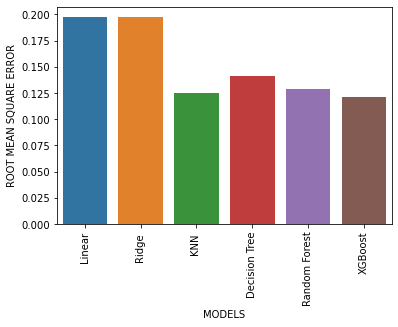

In [74]:
sn.barplot(labels,acc)
plt.ylabel('ROOT MEAN SQUARE ERROR')

plt.xlabel('MODELS')
plt.xticks(rotation=90)
plt.show()

## (2) R-SQAURE SCORE 

In [75]:
ev_r2=[r2_lr,r2_rr,r2_knn,r2_dt,r2_rf,r2_xgb]
print(ev_r2)
labels=['Linear','Ridge ','KNN ','Decision Tree','Random Forest','XGBoost']

[0.10876756035072643, 0.10876749807248709, 0.6439535053011383, 0.5431875698655138, 0.6204008582589686, 0.663147670485765]


C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


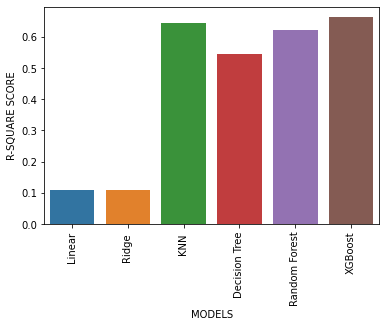

In [76]:
sn.barplot(labels,ev_r2)
plt.ylabel('R-SQUARE SCORE')

plt.xlabel('MODELS')
plt.xticks(rotation=90)
plt.show()

## (3) MEAN SQUARE ERROR

In [77]:
ev_mse=[mse_lr,mse_rr,mse_knn,mse_dt,mse_rf,mse_xgb]
print(ev_mse)
labels=['Linear','Ridge ','KNN ','Decision Tree','Random forest','XGBoost']

[0.03900083956439393, 0.03900084228972519, 0.015580797555663188, 0.019990372327231675, 0.016611474815312693, 0.014740849946448366]


C:\Users\RR_10\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


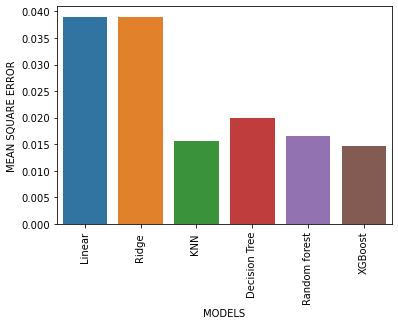

In [78]:
sn.barplot(labels,ev_mse)
plt.ylabel('MEAN SQUARE ERROR')

plt.xlabel('MODELS')
plt.xticks(rotation=90)
plt.show()